In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [79]:
superstore = pd.read_csv(r"C:\Users\91635\OneDrive\VS STUDIO\PracticeData\Repository\SampleSuperstore.csv")

In [80]:
superstore.head()
superstore.tail()
superstore.shape
superstore.info()
superstore.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Handling Missing Values

In [81]:
superstore.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [82]:
superstore.duplicated().sum()

17

In [83]:
superstore[superstore.duplicated(keep = 'last')].head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


In [84]:
superstore.drop_duplicates(inplace = True)
superstore.shape


(9977, 13)

Calculated Field-Profit Margin

In [85]:
superstore['Profit Margin %'] = (superstore.Profit / superstore.Sales) * 100
superstore.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin %
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25


Exploratory Data Analysis

1. Which Category is Best Selling and Most Profitable?

In [86]:
# Group sales, profit and quantity by category
category_analysis = pd.DataFrame(superstore.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum())
category_analysis

,Sales,Profit,Quantity
Category,,,
Furniture,741306.3133,18421.8137,8020
Office Supplies,718735.2440,122364.6608,22861
Technology,836154.0330,145454.9481,6939


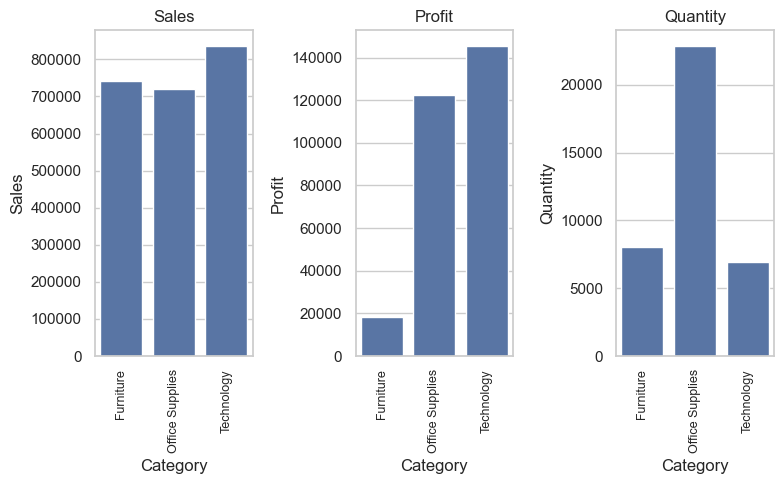

In [87]:
# Set for grouped plots - figure with a 2x2 grid of Axes
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(8, 5))

# Plot barplots
cat1 = sns.barplot(x = category_analysis.index, y = category_analysis.Sales, ax=axis[0])
cat2 = sns.barplot(x = category_analysis.index, y = category_analysis.Profit, ax=axis[1])
cat3 = sns.barplot(x = category_analysis.index, y = category_analysis.Quantity, ax=axis[2])

# Set titles
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')

# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 9)

# Set spacing between subplots
figure.tight_layout()

2. What are the Best Selling and Most Profitable Sub-Category?

In [88]:
# Group by sub-category
subcat_analysis = pd.DataFrame(superstore.groupby(['Sub-Category'])[['Sales', 'Profit']].sum())

# Sort by descending order according to sales
subcat_sales = pd.DataFrame(subcat_analysis.sort_values('Sales', ascending = False))
subcat_sales

,Sales,Profit
Sub-Category,,
Phones,330007.0540,44515.7306
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Tables,206965.5320,-17725.4811
Binders,203409.1690,30228.0003
Machines,189238.6310,3384.7569
Accessories,167380.3180,41936.6357
Copiers,149528.0300,55617.8249
Bookcases,114879.9963,-3472.5560


In [89]:
# Sort by descending order according to profit
subcat_profit = pd.DataFrame(subcat_analysis.sort_values('Profit', ascending = False))
subcat_profit

,Sales,Profit
Sub-Category,,
Copiers,149528.0300,55617.8249
Phones,330007.0540,44515.7306
Accessories,167380.3180,41936.6357
Paper,78224.1420,33944.2395
Binders,203409.1690,30228.0003
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Appliances,107532.1610,18138.0054
Furnishings,91683.0240,13052.7230


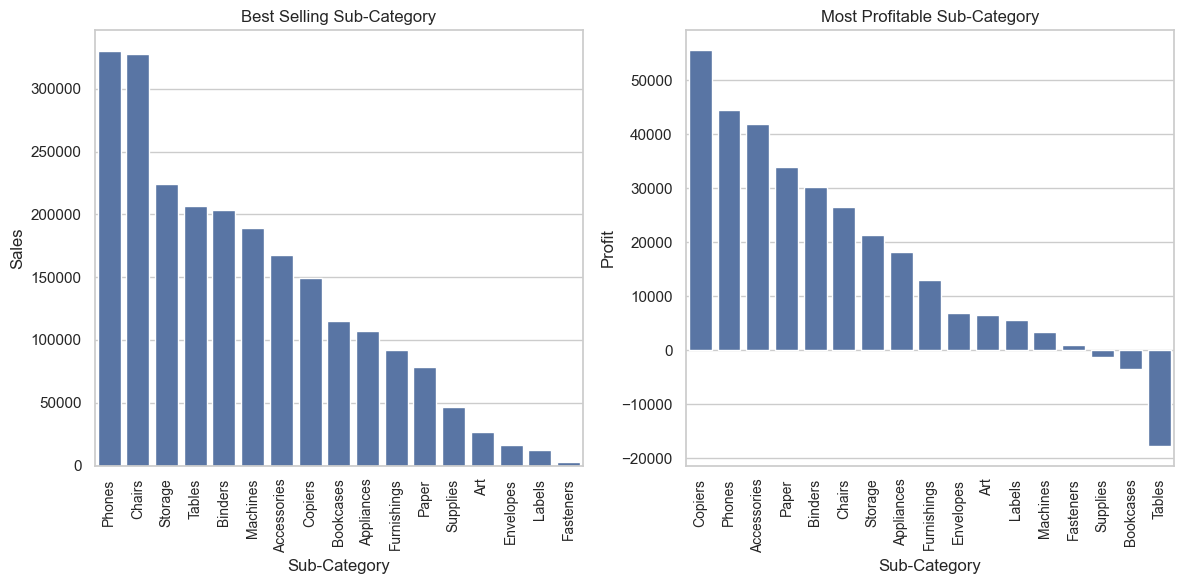

In [90]:
# Plot Bar Plots

sns.set_theme(style="whitegrid")

# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 6))

# Plot Bar Plot for Best Selling Sub-Category
subcat1 = sns.barplot(data = subcat_sales, x = subcat_sales.index, y = subcat_sales.Sales, ax=axis[0])
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)

# Plot Bar Plot for Most Profitable Sub-Category
subcat2 = sns.barplot(data = subcat_profit, x = subcat_profit.index, y = subcat_profit.Profit, ax=axis[1])
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)

# Set spacing between subplots
figure.tight_layout()

plt.show()

3. Which is the Top Selling Sub-Category?

In [91]:
subcat_quantity = pd.DataFrame(superstore.groupby(['Sub-Category'])[['Quantity']].sum().sort_values('Quantity',ascending=False))
subcat_quantity

,Quantity
Sub-Category,
Binders,5971
Paper,5144
Furnishings,3560
Phones,3289
Storage,3158
Art,2996
Accessories,2976
Chairs,2351
Appliances,1729


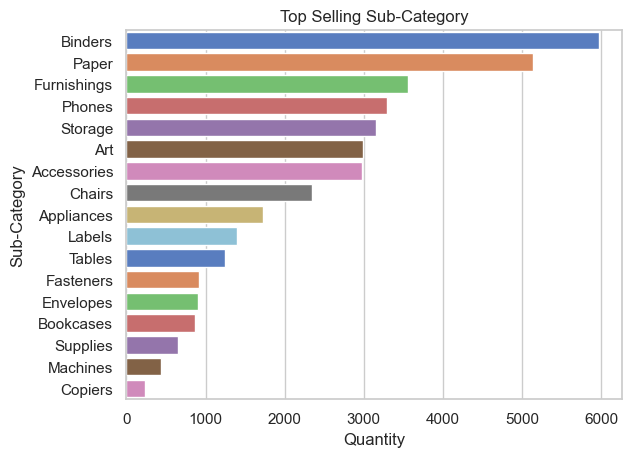

In [92]:
# Plot Bar Plot for Top Selling Sub-Category
sns.set_theme(style="whitegrid")
sns.barplot(data = subcat_quantity, y = subcat_quantity.index, x = subcat_quantity.Quantity, palette = "muted")
plt.title("Top Selling Sub-Category")
plt.show()

4. Which Customer Segment is Most Profitable?

In [93]:
segment_analysis = pd.DataFrame(superstore.groupby(['Segment'])[['Profit']].sum())
segment_analysis

,Profit
Segment,
Consumer,134007.4413
Corporate,91954.9798
Home Office,60279.0015


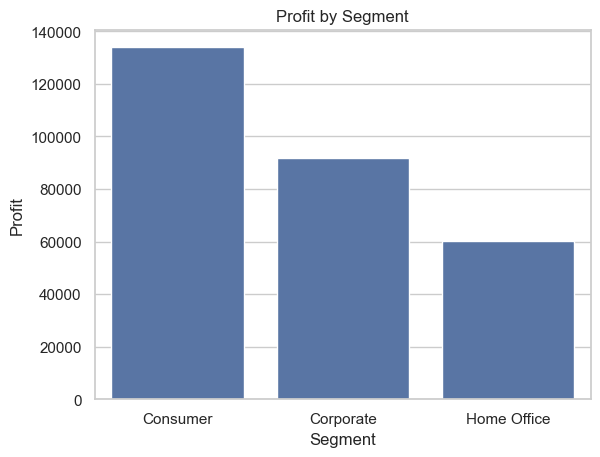

In [94]:
import seaborn as sns

# Create the bar chart
sns.barplot(x=segment_analysis.index, y='Profit', data=segment_analysis)

# Add labels and title
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.title('Profit by Segment')

# Display the chart
plt.show()


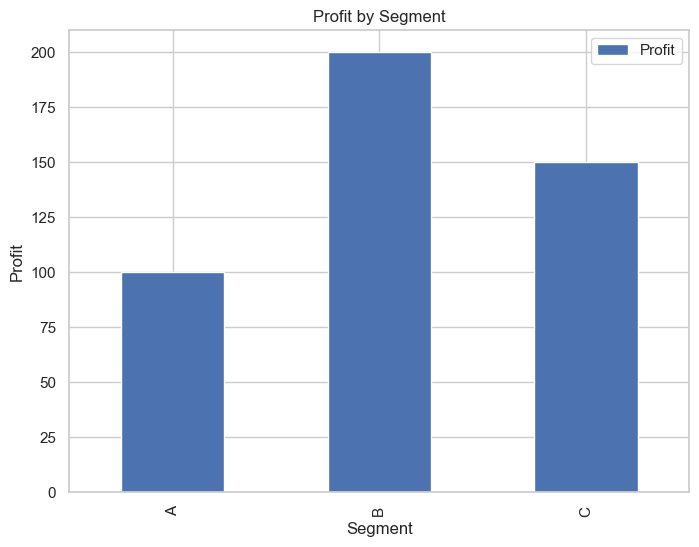

In [95]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have the 'segment_analysis' DataFrame
segment_analysis = pd.DataFrame({
    'Segment': ['A', 'B', 'C'],
    'Profit': [100, 200, 150]
})

# Create the bar chart
plt.figure(figsize=(8, 6))
segment_analysis.plot(kind='bar', x='Segment', y='Profit', ax=plt.gca())

# Add labels and title
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.title('Profit by Segment')

# Display the chart
plt.show()


5. Which is the Preferred Ship Mode?

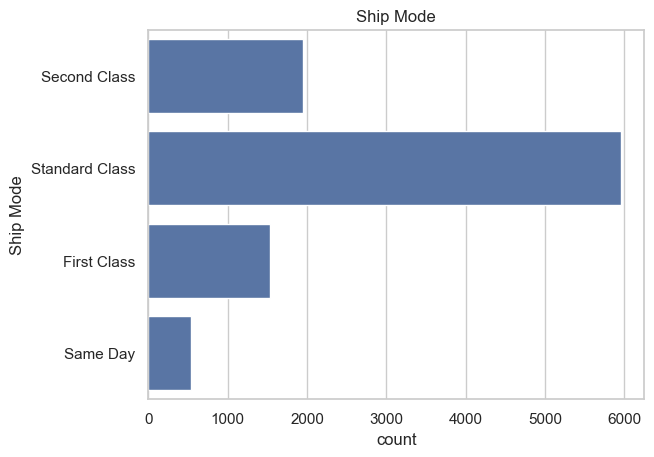

In [96]:
# Plot shipment mode
sns.set_theme(style="whitegrid")
sns.countplot(superstore['Ship Mode'])
plt.title("Ship Mode")
plt.show()

6. Which Region is the Most Profitable?


In [97]:
region_analysis = pd.DataFrame(superstore.groupby(['Region'])['Profit'].sum().reset_index())
region_analysis


,Region,Profit
0,Central,39655.8752
1,East,91506.3092
2,South,46749.4303
3,West,108329.8079


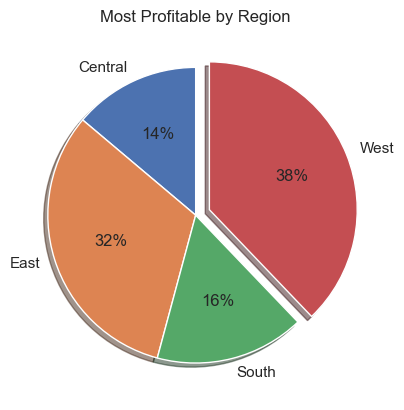

In [98]:
# Plot Pie Chart
explode = [0, 0, 0, 0.1]

plt.pie(region_analysis.Profit, labels = region_analysis.Region, startangle = 90, autopct = "%1.0f%%", explode = explode, shadow = True)
plt.title("Most Profitable by Region")

plt.show()

7. Which City has the Highest Number of Sales?


In [99]:
city_sales = superstore.groupby('City')[['Sales', 'Quantity']].sum().sort_values('Sales', ascending=False)
top10 = city_sales.head(10)

print(top10)


                     Sales  Quantity
City                                
New York City  256319.0410      3413
Los Angeles    175831.9010      2876
Seattle        119460.2820      1578
San Francisco  112577.1720      1920
Philadelphia   109061.4610      1978
Houston         64441.2564      1460
Chicago         48535.9770      1129
San Diego       47521.0290       670
Jacksonville    44713.1830       429
Springfield     43054.3420       649


In [100]:
bottom10 = city_sales[-10:]
bottom10

,Sales,Quantity
City,,
Missouri City,6.370,7
Keller,6.000,2
Layton,4.960,4
Springdale,4.300,2
San Luis Obispo,3.620,2
Ormond Beach,2.808,3
Pensacola,2.214,3
Jupiter,2.064,1
Elyria,1.824,1


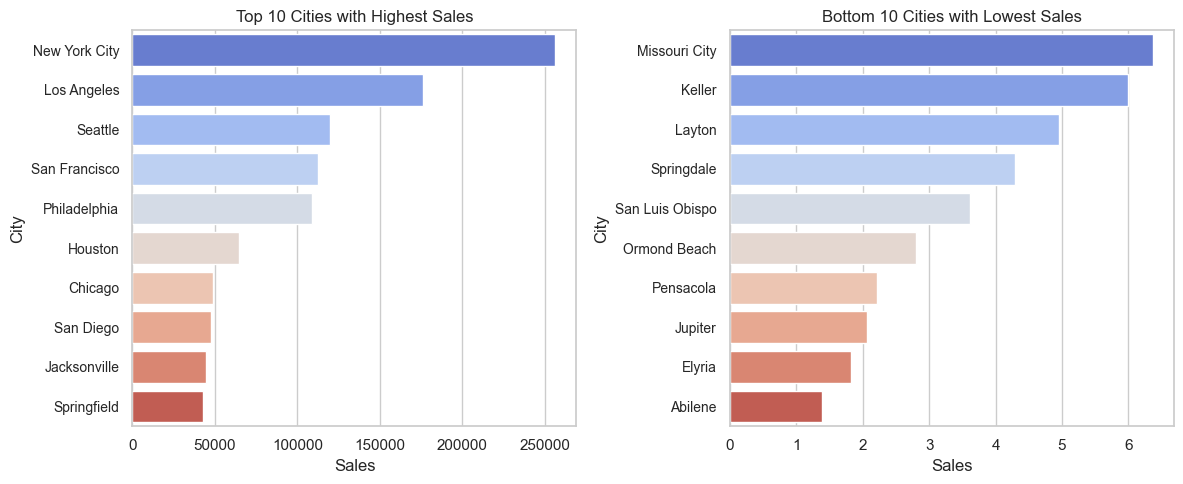

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Set the Seaborn theme
sns.set_theme(style="whitegrid")

# Plot the top 10 cities by sales
sns.barplot(data=top10, x="Sales", y="City", palette="coolwarm", ax=axes[0])
axes[0].set_title("Top 10 Cities with Highest Sales")
axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=10)

# Plot the bottom 10 cities by sales
sns.barplot(data=bottom10, x="Sales", y="City", palette="coolwarm", ax=axes[1])
axes[1].set_title("Bottom 10 Cities with Lowest Sales")
axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize=10)

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()
